In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tabulate

In [2]:
df = pd.read_excel('AngelList data.xlsx')

# fill in empty values
df['Company'].fillna(method='ffill', inplace=True)
df['Size'].fillna(method='ffill', inplace=True)
df['Min Equity'].fillna(0, inplace=True)
df['Max Equity'].fillna(0, inplace=True)

In [3]:
df['Senior'] = df['Job Title (Normalized)'].map(lambda x: 'Senior' in x or 'Manager' in x or 'CTO' in x)
df['Job Title (Normalized)'] = df['Job Title (Normalized)'].map(lambda x: x.replace('Senior ', '').strip())
df['Size'] = df['Size'].map(lambda x: x.strip())
df['Avg Salary'] = (df['Min Salary'] + df['Max Salary']) / 2
df['Avg Equity'] = (df['Min Equity'] + df['Max Equity']) / 2
df['Count'] = 1
display(df.head())

,Company,Tagline,Size,Job Title,Job Title (Normalized),Min Salary,Max Salary,Min Equity,Max Equity,Senior,Avg Salary,Avg Equity,Count
0,Cushion,"Your bank & credit card fees, refunded",1-10,Machine Learning Engineer,Machine Learning Engineer,120,160,0.25,1.00,False,140.0,0.625,1
1,Cushion,NaN,1-10,Full Stack Engineer,Fullstack Engineer,100,140,0.10,0.75,False,120.0,0.425,1
2,Terrace Consulting,We build technology solutions to help our clie...,11-50,Senior Software Engineer,Software Engineer,120,200,0.05,1.00,True,160.0,0.525,1
3,Terrace Consulting,NaN,11-50,Engineering Manager,Engineering Manager,120,160,1.00,3.00,True,140.0,2.000,1
4,Instrumental,Insights from your assembly line.,11-50,Senior Backend Engineer,Backend Engineer,130,160,0.09,2.00,True,145.0,1.045,1


In [4]:


display(pd.concat([df.groupby(['Job Title (Normalized)'])['Min Salary', 'Max Salary', 'Avg Salary', 'Min Equity', 'Max Equity', 'Avg Equity'].mean(), 
        df.groupby(['Job Title (Normalized)'])['Count'].sum()], axis=1))

,Min Salary,Max Salary,Avg Salary,Min Equity,Max Equity,Avg Equity,Count
Job Title (Normalized),,,,,,,
Backend Engineer,112.777778,156.250000,134.513889,0.105861,0.520556,0.313208,36
Data Engineer,118.823529,163.823529,141.323529,0.100294,0.532353,0.316324,17
Devops Engineer,123.928571,163.928571,143.928571,1.482071,1.723750,1.602911,28
Embedded Engineer,107.857143,154.285714,131.071429,0.021429,0.285714,0.153571,7
Engineering Manager,150.416667,176.666667,163.541667,0.177500,0.550000,0.363750,12
Frontend Engineer,110.270270,155.621622,132.945946,0.154595,0.819757,0.487176,37
Fullstack Engineer,106.454545,148.727273,127.590909,0.183745,0.816000,0.499873,55
Head of Engineering / CTO,117.708333,163.125000,140.416667,2.156250,5.060417,3.608333,24
Machine Learning Engineer,113.030303,160.000000,136.515152,0.170303,0.747879,0.459091,33


|                                      |   Min Salary |   Max Salary |   Avg Salary |   Min Equity |   Max Equity |   Avg Equity |   Count |
|:-------------------------------------|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|--------:|
| ('Backend Engineer', False)          |     103.75   |      150.833 |      127.292 |    0.105     |     0.44125  |     0.273125 |      24 |
| ('Backend Engineer', True)           |     130.833  |      167.083 |      148.958 |    0.107583  |     0.679167 |     0.393375 |      12 |
| ('Data Engineer', False)             |     115      |      144.286 |      129.643 |    0.0814286 |     0.225714 |     0.153571 |       7 |
| ('Data Engineer', True)              |     121.5    |      177.5   |      149.5   |    0.1135    |     0.747    |     0.43025  |      10 |
| ('Devops Engineer', False)           |     122.857  |      160.714 |      141.786 |    1.95505   |     2.23024  |     2.09264  |      21 |
| ('Devops En

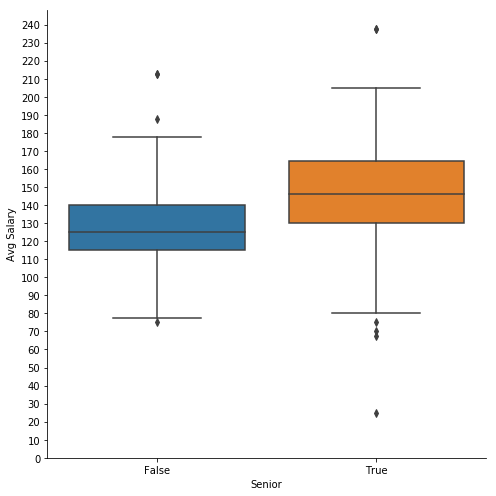

In [5]:
chart = sns.catplot(x='Senior', y='Avg Salary', data=df, height=7, kind='box')
chart.set(yticks=np.arange(0, 250, 10))
#display(df.groupby(['Job Title (Normalized)', 'Senior'])['Min Salary', 'Max Salary', 'Avg Salary', 'Min Equity', 'Max Equity', 'Avg Equity'].mean())
#display(df.groupby(['Job Title (Normalized)', 'Senior']).count())
print(tabulate.tabulate(pd.concat([df.groupby(['Job Title (Normalized)', 'Senior'])['Min Salary', 'Max Salary', 'Avg Salary', 'Min Equity', 'Max Equity', 'Avg Equity'].mean(),
                                   df.groupby(['Job Title (Normalized)', 'Senior'])['Count'].sum() ], axis=1), tablefmt="pipe", headers="keys"))

In [ ]:
chart = sns.catplot(x='Job Title (Normalized)', y='Avg Equity', data=df, height=10, kind='bar')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 7, 0.2))

In [ ]:
chart = sns.catplot(x='Job Title (Normalized)', y='Avg Salary', data=df, height=10, kind='box')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 250, 10))
plt.show()

In [ ]:
sns.set_style("darkgrid")
chart = sns.catplot(x='Job Title (Normalized)', y='Avg Salary', data=df, height=10, kind='box', hue='Senior')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 250, 10))
plt.show()

In [ ]:
chart = sns.catplot(x='Job Title (Normalized)', y='Avg Equity', data=df, height=10, kind='bar', hue='Senior')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 6.6, 0.2))
plt.show()

In [ ]:
chart = sns.catplot(x='Size', y='Avg Equity', data=df, height=5, kind='bar')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 3, 0.2))
plt.plot()
display(df.groupby(['Size'], sort=False)['Min Salary', 'Max Salary', 'Min Equity', 'Max Equity', 'Avg Salary', 'Avg Equity'].mean())
display(df['Size'].value_counts())



In [ ]:
chart = sns.catplot(x='Size', y='Avg Salary', data=df, height=5, kind='bar')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 250, 10))

,Min Salary,Max Salary,Min Equity,Max Equity,Avg Salary,Avg Equity,Count
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.0
mean,114.189266,157.926554,0.399381,1.081545,136.057910,0.740463,1.0
std,28.038638,31.271365,1.494783,2.674432,27.966596,2.018772,0.0
min,0.000000,50.000000,0.000000,0.000000,25.000000,0.000000,1.0
25%,100.000000,140.000000,0.000000,0.040000,120.000000,0.030000,1.0
50%,115.000000,160.000000,0.043500,0.300000,135.000000,0.187500,1.0
75%,130.000000,180.000000,0.250000,1.000000,155.000000,0.625000,1.0
max,200.000000,275.000000,15.000000,30.000000,237.500000,22.500000,1.0


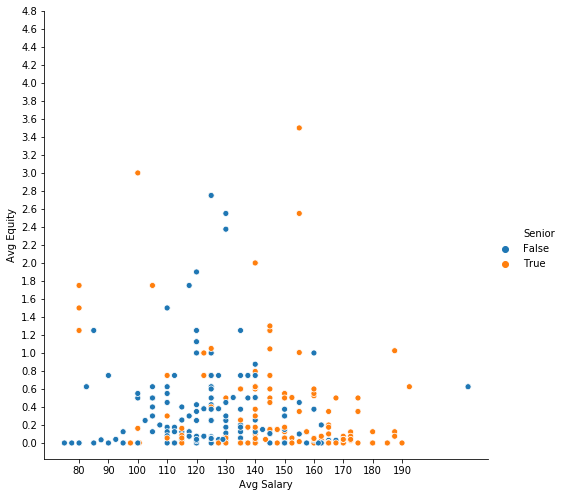

In [11]:
display(df.describe())
filtered_df = df[(df['Job Title (Normalized)'] != 'Head of Engineering / CTO') & (df['Avg Equity'] < 5) ]
chart = sns.relplot(x="Avg Salary", y="Avg Equity", hue="Senior", data=filtered_df, height=7);
chart.set(xticks=np.arange(80, 200, 10))
chart.set(yticks=np.arange(0, 5, 0.2))